## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [14]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from scipy import stats

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

In [16]:
crash_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv"
)
soccer_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv"
)

<IPython.core.display.Javascript object>

In [17]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


<IPython.core.display.Javascript object>

In [18]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [24]:
crash_nulls= crash_data.isnull().mean().sort_values(ascending=True)

bad_cols= [i for i,v in crash_nulls.iteritems() if v>=.05]

crash_data= crash_data.drop(columns=bad_cols)
crash_data


,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,...,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,...,332.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,1831.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,...,1921.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,JC378354,8/4/2019 15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,815.0,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0
372581,JC406679,8/25/2019 13:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,...,1622.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0
372582,JC406342,8/25/2019 6:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,512.0,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,0.0,0.0
372583,JC386106,8/9/2019 21:24,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,1733.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0


<IPython.core.display.Javascript object>

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

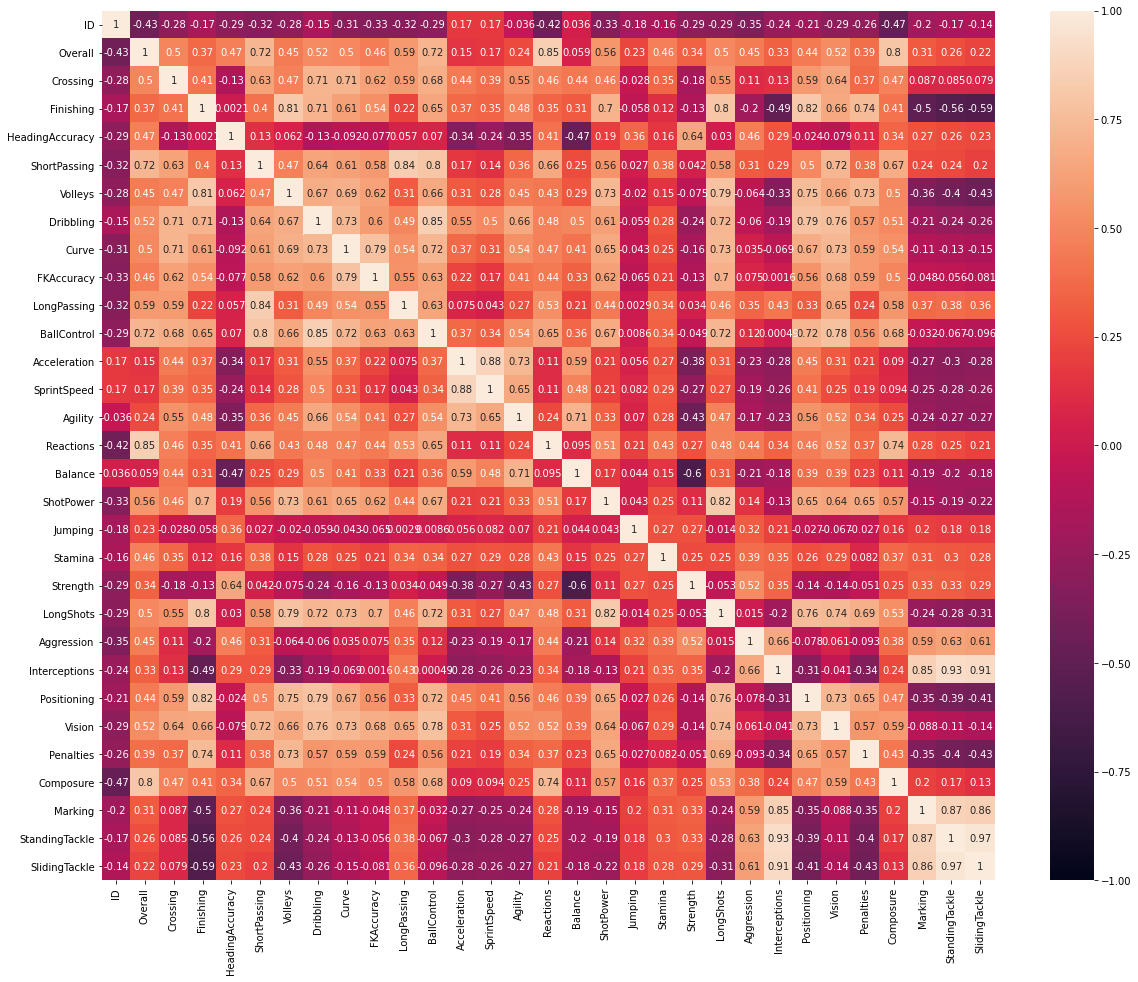

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(20,16))
sns.heatmap(soccer_data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()





In [46]:
soccer_corr = soccer_data.corr().abs()
soccer_corr = soccer_corr.replace(1, np.nan)
top_5_corr = soccer_corr.nlargest(5, "Overall")
top_5_corr_list = list(top_5_corr.index)
top_5_corr_list

['Reactions', 'Composure', 'ShortPassing', 'BallControl', 'LongPassing']

<IPython.core.display.Javascript object>

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [50]:
X = soccer_data.drop(columns=["ID", "Name", "Overall"])
y = soccer_data["Overall"]

selector = SelectKBest(f_regression, k=5)
# selector= SelectKBest(mutual_info_regression,k=5)

k_best = selector.fit_transform(X, y)
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())

col_names = X.columns[selector.get_support()]
best_df = pd.DataFrame(k_best, columns=col_names)
best_df.head()

         feature       f_score
13     Reactions  41177.634074
25     Composure  29009.062753
3   ShortPassing  17626.722526
9    BallControl  17146.460079
8    LongPassing   8391.416302


,ShortPassing,LongPassing,BallControl,Reactions,Composure
0,90,87,96,95,96
1,81,77,94,96,95
2,84,78,95,94,94
3,92,91,91,91,88
4,89,83,94,90,91


<IPython.core.display.Javascript object>

In [51]:
selector = SelectKBest(mutual_info_regression, k=5)

k_best = selector.fit_transform(X, y)
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())

col_names = X.columns[selector.get_support()]
best_df = pd.DataFrame(k_best, columns=col_names)
best_df.head()

         feature   f_score
13     Reactions  0.570394
25     Composure  0.461047
9    BallControl  0.408028
3   ShortPassing  0.366460
5      Dribbling  0.247708


,ShortPassing,Dribbling,BallControl,Reactions,Composure
0,90,97,96,95,96
1,81,88,94,96,95
2,84,96,95,94,94
3,92,86,91,91,88
4,89,95,94,90,91


<IPython.core.display.Javascript object>

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

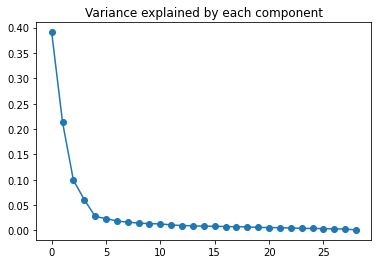

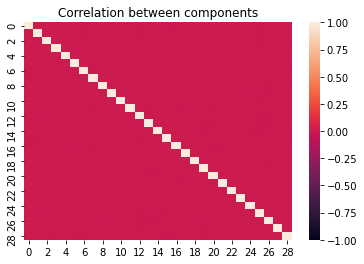

<IPython.core.display.Javascript object>

In [53]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

pca = PCA()
pca_X = pca.fit_transform(scaled_X)

plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("Variance explained by each component")
plt.show()

pca_df = pd.DataFrame(pca_X)
sns.heatmap(pca_df.corr(), vmin=-1, vmax=1)
plt.title("Correlation between components")
plt.show()

In [54]:
pca.explained_variance_ratio_

array([0.3908719 , 0.21348826, 0.09910329, 0.06072381, 0.02777298,
       0.02328582, 0.01875075, 0.01622877, 0.01464166, 0.01333261,
       0.01299086, 0.0108381 , 0.00963704, 0.00914795, 0.00832584,
       0.00825603, 0.00766723, 0.00734617, 0.00704042, 0.00595847,
       0.00576829, 0.00532057, 0.00495141, 0.00407769, 0.0038831 ,
       0.00364779, 0.00307561, 0.002815  , 0.0010526 ])

<IPython.core.display.Javascript object>

In [57]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

<IPython.core.display.Javascript object>

In [80]:
print(pd.DataFrame(pca.components_, columns=pca_df.columns, index=["PC-1", "PC-2"]))

ValueError: Shape of passed values is (29, 29), indices imply (2, 29)

<IPython.core.display.Javascript object>